<a href="https://colab.research.google.com/github/aidandreyes/R-Code/blob/main/defensive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBA Defensive Statistic Analysis (2024-25 Season)**

### **AIDAN REYES**

---
This project uses preexisting data from the 2024-2025 NBA season via the NBA.com website.

Per game data can be viewed [here](https://www.nba.com/stats/players/defense?SeasonType=Regular+Season); season total data can be viewed [here](https://www.nba.com/stats/players/defense?SeasonType=Regular+Season&PerMode=Totals). Defensive field goals allowed stats were taken from [this page](https://www.nba.com/stats/players/defense-dash-overall?PerMode=Totals&SeasonType=Regular+Season&Season=2024-25).

Make sure to download and add the Excel file from [here](https://github.com/aidandreyes/NBA-Defensive-Analysis/blob/main/nba_defense.xlsx) into the local file directory before starting.

A glossary for all the abbreviated basketball statistic terms used can be found [here](https://github.com/aidandreyes/NBA-Defensive-Statistic-Analysis/blob/main/StatGlossary.md).





---



In [ ]:
# Install packages
install.packages("dslabs")
install.packages("readxl")
install.packages("writexl")
install.packages("dplyr")


In [ ]:
# Load libraries
library (jsonlite)
library(rvest)
library(ggplot2)
library(readxl)
library (dplyr)

---

I previously exported data from the website manually to create my own Excel sheet.

In [ ]:
# Export excel sheet
defense_excel <- read_excel("nba_defense.xlsx")

# Create csv file
write.csv(x = defense_excel, file = "nba_defense.csv", row.names = TRUE)

In [4]:
# Create data frame from the csv file
defensive_df <- as.data.frame(read.csv("nba_defense.csv"))
# Remove original player ID column
defensive_df <- defensive_df[, -which(names(defensive_df) == "X")]
# Omit any players with missing / invalid values
na.omit(defensive_df)


,PLAYER,POSITION,TEAM,AGE,GAMES_PLAYED,WINS,LOSSES,MIN_TOTAL,MIN_PER_GAME,DEF_RTG,⋯,OPP_2ND_CHANCE_PPG,OPP_FB_PTS_TOTAL,OPP_FB_PPG,OPP_PAINT_PTS_TOTAL,OPP_PAINT_PPG,DEF_WS_TOTAL,DEF_WS_PER_GAME,DFGM,DFGA,DFG_PCT
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,A.J. Lawson,G,TOR,24,26,14,12,486,18.7,111.1,⋯,6.5,182,7.0,520,20.0,1.7,0.064,75,164,45.7
2,AJ Green,G,MIL,25,73,44,29,1659,22.7,107.6,⋯,5.9,483,6.6,1578,21.6,7.3,0.100,344,751,45.8
3,AJ Johnson,G,WAS,20,29,8,21,638,22.0,115.6,⋯,8.2,242,8.3,690,23.8,1.3,0.045,117,261,44.8
4,Aaron Gordon,F,DEN,29,51,33,18,1447,28.4,113.0,⋯,8.0,472,9.3,1562,30.6,4.1,0.080,277,579,47.8
5,Aaron Holiday,G,HOU,28,62,39,23,792,12.8,103.6,⋯,3.8,223,3.6,796,12.8,4.6,0.074,138,329,41.9
6,Aaron Nesmith,G-F,IND,25,45,29,16,1122,24.9,111.5,⋯,7.6,290,6.4,1182,26.3,3.6,0.081,191,439,43.5
7,Aaron Wiggins,G,OKC,26,76,62,14,1744,22.9,106.6,⋯,7.9,407,5.4,1630,21.4,8.2,0.107,374,794,47.1
8,Adam Flagler,G,OKC,25,37,34,3,203,5.5,96.7,⋯,1.6,45,1.2,168,4.5,1.5,0.041,30,73,41.1
9,Adama Sanogo,F,CHI,23,4,2,2,21,5.4,122.2,⋯,1.8,7,1.8,16,4.0,0.0,0.001,5,12,41.7


I wanted to filter out players that barely played this season to take into account players who only mainly play in garbage time (final minutes where other team has essentially given up), players on G-League or 10-day contracts, and players who had injury-filled seasons.

To do this, I cleaned the data frame to only include players that played at least 500 minutes this season.

In [5]:
# Clean data frame to only include players that played at least 500 minutes
defensive_df <- defensive_df[defensive_df$MIN_TOTAL >= 500, ]

This filtered our data size from 569 players to 375 players.

In [6]:
# Convert categorical variables PLAYER, TEAM, POSITION into factors
defensive_df$PLAYER <- as.factor (defensive_df$PLAYER)
defensive_df$POSITION <- as.factor(defensive_df$POSITION)
defensive_df$TEAM <- as.factor (defensive_df$TEAM)

# Fix position levels since C-F is same as F-C and F-G is same as G-F
levels(defensive_df$POSITION)[levels(defensive_df$POSITION)=="C-F"] <- "F-C"
levels(defensive_df$POSITION)[levels(defensive_df$POSITION)=="F-G"] <- "G-F"
str(defensive_df)

'data.frame':	375 obs. of  33 variables:
 $ PLAYER                  : Factor w/ 375 levels "Aaron Gordon",..: 6 7 1 2 3 4 5 8 9 10 ...
 $ POSITION                : Factor w/ 5 levels "C","F-C","F",..: 5 5 3 5 4 5 3 5 2 5 ...
 $ TEAM                    : Factor w/ 30 levels "ATL","BKN","BOS",..: 17 30 8 11 12 21 23 21 3 16 ...
 $ AGE                     : int  25 20 29 28 25 26 22 23 39 33 ...
 $ GAMES_PLAYED            : int  73 29 51 62 45 76 58 36 60 49 ...
 $ WINS                    : int  44 8 33 39 29 62 12 31 44 26 ...
 $ LOSSES                  : int  29 21 18 23 16 14 46 5 16 23 ...
 $ MIN_TOTAL               : int  1659 638 1447 792 1122 1744 905 597 1659 863 ...
 $ MIN_PER_GAME            : num  22.7 22 28.4 12.8 24.9 22.9 15.6 16.6 27.6 17.6 ...
 $ DEF_RTG                 : num  108 116 113 104 112 ...
 $ DREB_TOTAL              : int  156 51 167 65 141 214 153 50 290 109 ...
 $ DREB_PER_GAME           : num  2.1 1.8 3.3 1 3.1 2.8 2.6 1.4 4.8 2.2 ...
 $ DREB_PCT             

---
Use the original dataframe and plot the data onto a boxplot to visualize the best and worst teams by defensive rating. This will allow for visual access to outlying players and what the league average is.

Warning message in geom_text(aes(x = 0, y = mean(DEF_RTG), label = "League Average"), :
“All aesthetics have length 1, but the data has 375 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


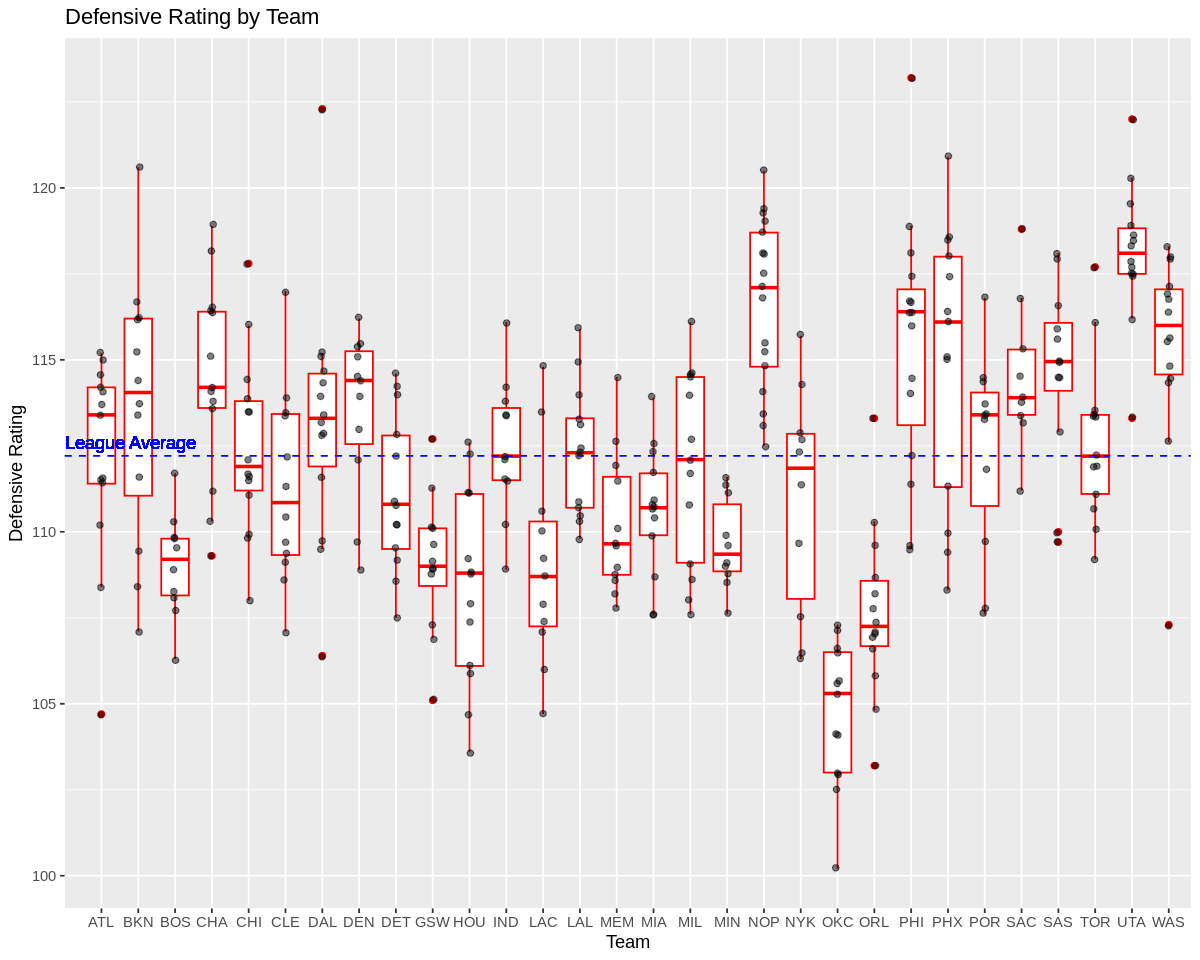

In [30]:
# Boxplot: Defensive Rating by Team
ggplot(defensive_df, aes(x = TEAM, y = DEF_RTG), options(repr.plot.width = 10, repr.plot.height = 8)) +
  geom_boxplot(color = "red") +
  geom_jitter(width = 0.05, alpha = 0.5) +
  geom_hline(yintercept = mean(defensive_df$DEF_RTG), color = "blue", linetype = "dashed") + # league average
  geom_text(aes(x = 0, y = mean(DEF_RTG),label = "League Average"), color = "blue", hjust = 0, vjust = -0.5) +
  labs(title = "Defensive Rating by Team",
        x = "Team",
        y = "Defensive Rating")

**Observations**

This boxplot shows which teams are above and below the league average. At the bottom, we see players on Oklahoma City have the lowest interquartile range in defensive rating, indicating their team has the best defensive rating in the NBA. On the other hand, players on Utah have the highest interquartile range, indicating they have the worst defensive rating.

---
Acquire the average defensive rating for each team by grouping players by what teams they play for. This will give a better idea of how team defensive stats will affect a player's individual defensive stats. There is a good chance there will be outlying players with good individual defensive stats but play on teams with bad defensive stats.

In [36]:
# Group by team
avg_drtg_by_team <- defensive_df %>%
  group_by(TEAM)%>%
  summarise(Mean_DEF_RTG = mean(DEF_RTG, na.rm = TRUE, 1))

# Create data frame for team defensive rating
avg_drtg_by_team <- as.data.frame(avg_drtg_by_team)
names(avg_drtg_by_team) <- c("TEAM", "DEF_RTG")

# Defensive Rating in order from best to worst
avg_drtg_by_team[order(avg_drtg_by_team$DEF_RTG),]

# Worst Defensive Rating
#avg_drtg_by_team[avg_drtg_by_team$DEF_RTG == max(avg_drtg_by_team$DEF_RTG), ]

# Best Defensive Rating
#avg_drtg_by_team[avg_drtg_by_team$DEF_RTG == min(avg_drtg_by_team$DEF_RTG), ]

#print(paste("AVERAGE TEAM DEFENSIVE RATING: ", mean(avg_drtg_by_team$DEF_RTG, 1)))

,TEAM,DEF_RTG
,<fct>,<dbl>
21,OKC,105.30
22,ORL,107.25
13,LAC,108.70
11,HOU,108.80
10,GSW,109.00
3,BOS,109.20
18,MIN,109.35
15,MEM,109.65
16,MIA,110.70


[1] "BEST DEFENSIVE RATING:  100.2 - Ajay Mitchell"
[1] "WORST DEFENSIVE RATING:  123.2 - Justin Edwards"
[1] "LEAGUE AVERAGE:  112.208"


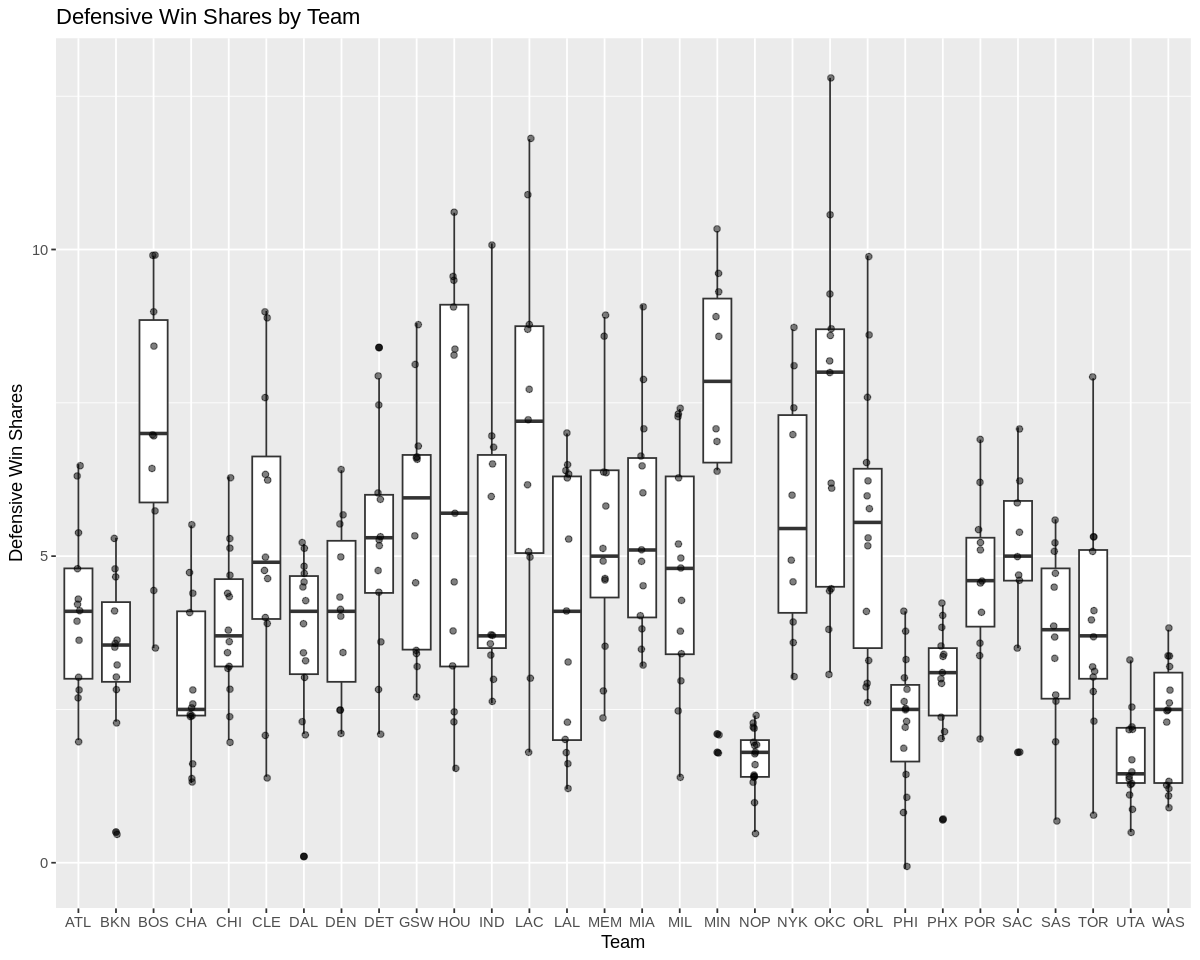

In [37]:
# DISPOSABLE CODE EXAMPLE TEST

lowest_drtg <- min(defensive_df$DEF_RTG, na.rm = TRUE)
print(paste("BEST DEFENSIVE RATING: ", lowest_drtg, "-" ,defensive_df[defensive_df$DEF_RTG == lowest_drtg, "PLAYER"]))

highest_drtg <- max(defensive_df$DEF_RTG, na.rm = TRUE)
print(paste("WORST DEFENSIVE RATING: ", highest_drtg, "-" ,defensive_df[defensive_df$DEF_RTG == highest_drtg, "PLAYER"]))

average_drtg <- mean(defensive_df$DEF_RTG, na.rm = TRUE)
print(paste("LEAGUE AVERAGE: ", average_drtg))

gsw <- defensive_df[defensive_df$TEAM == "GSW",]

#defensive_df[order(defensive_df$TEAM), c("PLAYER", "TEAM", "DEF_RTG")]

#defensive_df[defensive_df$PLAYER == "Dyson Daniels", ]
ggplot(defensive_df, aes(x = TEAM, y = DEF_WS_TOTAL), options(repr.plot.width = 10, repr.plot.height = 8)) +
  geom_boxplot() +
  geom_jitter(width = 0.05, alpha = 0.5) +
  labs(title = "Defensive Win Shares by Team",
        x = "Team",
        y = "Defensive Win Shares")

#defensive_df[order(defensive_df$DEF_WS_TOTAL, decreasing = TRUE), ]